<a href="https://colab.research.google.com/github/ss15543/primevideo_disney-_recommendation/blob/main/Sharma_Surabhi_dataproject01_dwd_fall2021_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

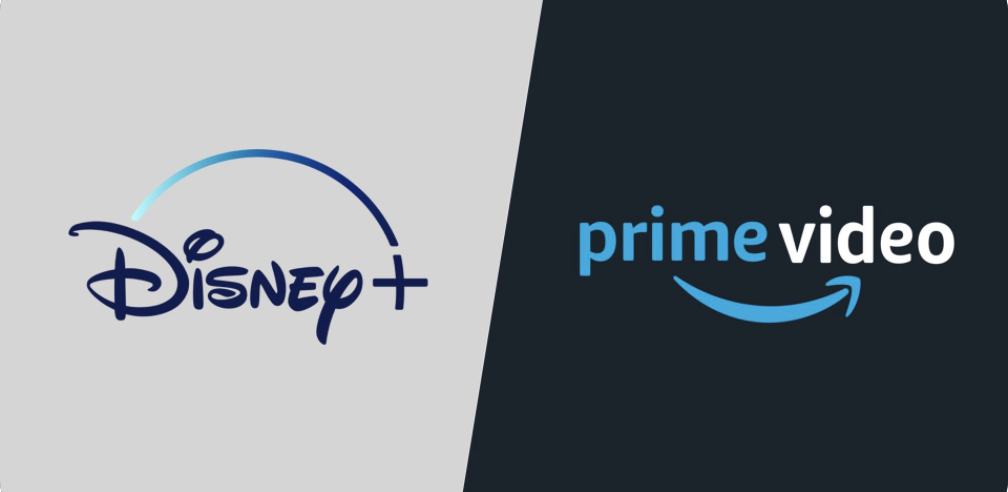

# INTRODUCTION

---
This project analyzes all the content in Disney+ and Amazon Prime Video platforms as of mid-2021. Tv shows and movies are distributed on the basis of these attributes:
*   Name
*   Ratings
*   Director
*   Year of release
*   Production location (by country)
*   Genre

The goal of this analysis is to identify the commonalities and differences between the content in these streaming platform. The results from this research could be benefitial to a content creator deciding between platforms to release their content. It could also help a viewer to decide on a platforms to subscribe to.

---

**Data Source:**
*   Disney+ : https://www.kaggle.com/shivamb/disney-movies-and-tv-shows
*   Amazon Prime Video : https://www.kaggle.com/shivamb/amazon-prime-movies-and-tv-shows

---
**Pre-processing Count:**
*   Disney+ : 1450 entries
*   Amazon Prime Video : 9668 entries

**Post-processing Count:**
*   Disney+ : 1444 entries
*   Amazon Prime Video : 9668 entries




# DISNEY +

## d1: Library Imports


---

Total no. of entries: 1450



In [ ]:
import pandas as pd
import numpy as np
import io

from google.colab import files
uploaded = files.upload()

Saving disney_plus_titles.csv to disney_plus_titles.csv


In [ ]:
disney = pd.read_csv(io.BytesIO(uploaded['disney_plus_titles.csv']), header=0)

In [ ]:
disney.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


In [ ]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


## d2: Data Pre-Processing

**Renaming columns**


---



In [ ]:
# changing column names
renaming_dict = {
    'show_id':'Unique_ID',
    'type': 'Content_type',
    'title': 'Name',
    'director': 'Director',
    'cast': 'Cast',
    'country': 'Production_Country',
    'date_added' : 'Date_added',
    'release_year' : 'Release_year',
    'rating' : 'Rating',
    'duration' : 'Duration',
    'listed_in' : 'Genre',
    'description' : 'Description'
}

disney.rename(columns=renaming_dict, inplace=True)
disney.head(5)

,Unique_ID,Content_type,Name,Director,Cast,Production_Country,Date_added,Release_year,Rating,Duration,Genre,Description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


**Replacing PG and G values on 'Ratings' column**

---



In [ ]:
# Noticed that TV-PG and PG are marked separate
# Also TV-G and G are marked separate
# since they represent the same, changing all PG to TV-PG and G to TV-G as they denote the same
disney['Rating'].replace({'PG': 'TV-PG', 'G': 'TV-G'}, inplace=True)
disney['Rating'].value_counts()

TV-G        571
TV-PG       537
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: Rating, dtype: int64

**Dropping unnecessary columns**


---



In [ ]:
#Removing Cast and Description columns as no analysis will be done on them
disney.drop('Cast', axis=1, inplace=True)
disney.drop('Description', axis=1, inplace=True)

**Dealing with null values**

---
1.   Director : 473 null values
2.   Production_Country : 219 null values  
3. Date_added : 3 null values
4. Rating : 3 null values




In [ ]:
# finding null values by column
disney.isnull().sum()

Unique_ID               0
Content_type            0
Name                    0
Director              473
Production_Country    219
Date_added              3
Release_year            0
Rating                  3
Duration                0
Genre                   0
dtype: int64

In [ ]:
# NaNs on Rating : total 3 (s5, s277, s281)
bool_series = pd.isnull(disney["Rating"])
disney[bool_series]

,Unique_ID,Content_type,Name,Director,Production_Country,Date_added,Release_year,Rating,Duration,Genre
4,s5,TV Show,The Beatles: Get Back,NaN,NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music"
276,s277,Movie,Disney My Music Story: Perfume,Kentaro Takayanagi,NaN,"March 19, 2021",2019,NaN,53 min,"Biographical, Documentary, Music"
280,s281,TV Show,Marvel Studios ASSEMBLED,NaN,NaN,"March 12, 2021",2021,NaN,1 Season,"Anthology, Docuseries"


In [ ]:
# Removing these three entries as they have multiple NaN values in other columns as well
disney.drop([4,276,280], axis=0, inplace=True)

In [ ]:
# list of NaT on Date_added ; 3 (s1440, s1441, s1442)
bool_series = pd.isnull(disney["Date_added"])
disney[bool_series]

,Unique_ID,Content_type,Name,Director,Production_Country,Date_added,Release_year,Rating,Duration,Genre
1439,s1440,TV Show,Disney Kirby Buckets,NaN,United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age"
1440,s1441,TV Show,Disney Mech-X4,NaN,Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction"
1441,s1442,TV Show,Imagination Movers,NaN,United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music"


In [ ]:
# Removing these three TV show entires as they don't have the dates on when they were added to Disney+ platform
disney.drop([1439,1440,1441], axis=0, inplace=True)

**Subsetting into movies and tvshows to investigate further**


---



In [ ]:
# subsetting shows vs movies
disneyMovies = disney.query('Content_type == "Movie"').copy()
disneyTvShows = disney.query('Content_type == "TV Show"').copy()

### Movies

In [ ]:
disneyMovies.head(3)

NameError: ignored

In [ ]:
# There are atmost 932 movies with complete data
disneyMovies.info()

In [ ]:
disneyMovies.isnull().sum()

**Dealing with NaN fields for Director and Production_Country columns for Dinsey Movies**


---



In [ ]:
# list of null values on both columns together
bool_series1 = pd.isnull(disneyMovies["Director"])
bool_series2 = pd.isnull(disneyMovies["Production_Country"])
bool_series = bool_series1 & bool_series2
len(disneyMovies[bool_series])

In [ ]:
#Since these will be categorical variables, Replacing NaN with Unknown for all three fields
disneyMovies['Director'].replace({np.nan :'Unknown'}, inplace=True)
disneyMovies['Production_Country'].replace({np.nan :'Unknown'}, inplace=True)

In [ ]:
disneyMovies["Director"].value_counts()

In [ ]:
disneyMovies["Production_Country"].value_counts()

In [ ]:
#Removing Content_type column as it is redundant
disneyMovies.drop('Content_type', axis=1, inplace=True)
disneyMovies.drop('Duration', axis=1, inplace=True)

**Changing datatype**


---



In [ ]:
disneyMovies["Director"] = pd.Categorical(disneyMovies["Director"])
disneyMovies["Production_Country"] = pd.Categorical(disneyMovies["Production_Country"])
disneyMovies["Date_added"] = pd.to_datetime(disneyMovies["Date_added"], errors='coerce')
disneyMovies["Rating"]= pd.Categorical(disneyMovies["Rating"])
disneyMovies["Genre"] = pd.Categorical(disneyMovies["Genre"])

In [ ]:
disneyMovies.info()

In [ ]:
# Resetting the index
disneyMovies.reset_index(drop=True, inplace=True)

---
**SUMMARY**

*   Total no. of entries in disneyMovies dataframe: 1051
*   Total no. entires dropped: 0
*   Total no. of columns: 8

---



### Tv Shows

In [ ]:
disneyTvShows.head(3)

,Unique_ID,Content_type,Name,Director,Production_Country,Date_added,Release_year,Rating,Duration,Genre
6,s7,TV Show,Hawkeye,NaN,NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero"
7,s8,TV Show,Port Protection Alaska,NaN,United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival"
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family"


In [ ]:
disneyTvShows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 6 to 1434
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unique_ID           393 non-null    object
 1   Content_type        393 non-null    object
 2   Name                393 non-null    object
 3   Director            0 non-null      object
 4   Production_Country  282 non-null    object
 5   Date_added          393 non-null    object
 6   Release_year        393 non-null    int64 
 7   Rating              393 non-null    object
 8   Duration            393 non-null    object
 9   Genre               393 non-null    object
dtypes: int64(1), object(9)
memory usage: 33.8+ KB


**Dealing with NaN on Director and Production_Country columns**


---



In [ ]:
#Since the director field is null for all entires, we can delete this column
disneyTvShows.drop('Director', axis=1, inplace=True)

# dropping Content_type field as it is redundant
disneyTvShows.drop('Content_type', axis=1, inplace=True)

In [ ]:
# replacing the null fields in Production_country field with unknown
disneyTvShows['Production_Country'].replace({np.nan :'Unknown'}, inplace=True)

In [ ]:
#changing to desired data types
disneyTvShows["Production_Country"] = pd.Categorical(disneyTvShows["Production_Country"])
disneyTvShows["Date_added"] = pd.to_datetime(disneyTvShows["Date_added"], errors='coerce')
disneyTvShows["Rating"]= pd.Categorical(disneyTvShows["Rating"])
disneyTvShows["Genre"] = pd.Categorical(disneyTvShows["Genre"])

In [ ]:
# Resetting the index
disneyTvShows.reset_index(drop=True, inplace=True)

In [ ]:
disneyTvShows.tail(5)

,Unique_ID,Name,Production_Country,Date_added,Release_year,Rating,Duration,Genre
388,s1407,Wild Yellowstone,Germany,2019-11-12,2015,TV-PG,1 Season,"Animals & Nature, Docuseries, Travel"
389,s1413,Wizards of Waverly Place,United States,2019-11-12,2007,TV-G,4 Seasons,"Comedy, Coming of Age, Fantasy"
390,s1415,Wolverine and The X-Men,United States,2019-11-12,2008,TV-Y7,1 Season,"Action-Adventure, Animation, Kids"
391,s1418,X-Men: Evolution,United States,2019-11-12,2000,TV-Y7,4 Seasons,"Action-Adventure, Animation, Kids"
392,s1435,Smart Guy,United States,2019-10-01,1996,TV-G,3 Seasons,"Comedy, Coming of Age, Kids"


In [ ]:
disneyTvShows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unique_ID           393 non-null    object        
 1   Name                393 non-null    object        
 2   Production_Country  393 non-null    category      
 3   Date_added          393 non-null    datetime64[ns]
 4   Release_year        393 non-null    int64         
 5   Rating              393 non-null    category      
 6   Duration            393 non-null    object        
 7   Genre               393 non-null    category      
dtypes: category(3), datetime64[ns](1), int64(1), object(3)
memory usage: 24.8+ KB



---
**SUMMARY**

*   Total no. of entries in disneyTvShows dataframe: 393
*   Total no. entires dropped: 0
*   Total no. of columns: 8
---



## d3: Inserting the data

**Connection test**

---



In [ ]:
!pip install PyMySQL

#import the cursors classa AND the entire pymysql library
import pymysql.cursors
import pymysql

# Connect to the database ; created connection object
connection = pymysql.connect(host='35.185.14.29', # IP address
                             user='root',
                             password='Outofmy3',
                             db='platform', #schema
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

#create an cursor object. The cursor allows you to execute operations such as SQL statements.
cursor = connection.cursor()

#Write a simple query to test. This should return () since you have NOT inserted any data.
sql = "SELECT * from disneyMovies"
# tvShows / movies (table names) ; disney db name

#Pass the sql to the execute method
cursor.execute(sql)

#Fetch the results using .fetchall().
result = cursor.fetchall()
print(result)

()


**Inserting data into disneyMovies table**

---
Columns removed from the original dataset
*   Cast
*   Duration
*   Description
---




In [ ]:
for i,row in disneyMovies.iterrows():
    Unique_ID = row['Unique_ID']
    Name = row['Name']
    Director = row['Director']
    Production_Country = row['Production_Country']
    Date_added = row['Date_added']
    Release_year = row['Release_year']
    Rating = row['Rating']
    Genre = row['Genre']
    print(Unique_ID, Name,Director, Production_Country,Date_added, Release_year, Rating, Genre)

    # inserting into the database
    query_template ="INSERT INTO disneyMovies (Unique_ID, Name, Director, Production_Country,  Date_added,Release_year, Rating, Genre) VALUES(%s,%s, %s, %s, %s,%s,%s, %s)"
    query_parameters = (Unique_ID, Name, Director, Production_Country,  Date_added,Release_year, Rating, Genre)
    cursor.execute(query_template, query_parameters)
    connection.commit()

**Inserting data into disneyTvshows table**

---
Columns removed from the original dataset

*   Cast
*   Director
*   Description
---



In [ ]:
# exclude Content_type and director for tv shows
for i,row in disneyTvShows.iterrows():
    Unique_ID = row['Unique_ID']
    Name = row['Name']
    Production_Country = row['Production_Country']
    Date_added = row['Date_added']
    Release_year = row['Release_year']
    Rating = row['Rating']
    Duration = row['Duration']
    Genre = row['Genre']

    print(Unique_ID, Name, Production_Country, Date_added, Release_year, Rating, Duration, Genre)

    # inserting into the database
    query_template ="INSERT INTO disneyTvShows (Unique_ID, Name, Production_Country, Date_added,Release_year, Rating, Duration, Genre) VALUES(%s,%s, %s, %s, %s,%s,%s, %s)"
    query_parameters = (Unique_ID, Name, Production_Country,  Date_added,Release_year, Rating, Duration, Genre)
    cursor.execute(query_template, query_parameters)
    connection.commit()

# AMAZON PRIME VIDEO

## d1: Library Imports
---

Total no. of entries: 9668

In [ ]:
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()

Saving amazon_prime_titles.csv to amazon_prime_titles.csv


In [ ]:
amazon = pd.read_csv(io.BytesIO(uploaded['amazon_prime_titles.csv']), header=0)

In [ ]:
amazon.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...


In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


##d2: Data Pre-Processing

**Dealing with null values**


---



In [ ]:
amazon.drop('country', axis=1, inplace=True) # too few non-null values
amazon.drop('date_added', axis=1, inplace=True) # too few non-null values

#Dropping these columns as the anlysis will not be focused on them
amazon.drop('cast', axis=1, inplace=True)
amazon.drop('description', axis=1, inplace=True)

In [ ]:
#Replacing NaN with Unknown for three fields
amazon['director'].replace({np.nan :'Unknown'}, inplace=True)
amazon['rating'].replace({np.nan :'UNRATED'}, inplace=True)

**Dealing with the inconsistencies in Rating values**


---



In [ ]:
amazon['rating'].value_counts()

13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
UNRATED      370
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
NOT_RATE       3
NC-17          3
AGES_18_       3
AGES_16_       2
16             1
ALL_AGES       1
Name: rating, dtype: int64

In [ ]:
# 18+, AGES_18_, NC-17 are equivalent to TV-MA
amazon['rating'].replace({'18+':'TV-MA','AGES_18_':'TV-MA','NC-17':'TV-MA'}, inplace=True)

In [ ]:
# NR is equivalent to TV-NR
amazon['rating'].replace({'NR':'TV-NR'}, inplace=True)

In [ ]:
# 7+ falls under TV-PG according to TVPG
amazon['rating'].replace({'7+':'TV-PG'}, inplace=True)

In [ ]:
# 16+, 16, AGES_16_ fall under TV-14 according to TVPG
amazon['rating'].replace({'16+':'TV-14','16':'TV-14','AGES_16_':'TV-14'}, inplace=True)

In [ ]:
# NOT_RATE is equivalent to UNRATED
amazon['rating'].replace({'NOT_RATE':'UNRATED'}, inplace=True)

In [ ]:
# Ratings ALL, G, TV-G, ALL_AGES are equivalent
amazon['rating'].replace({'ALL_AGES':'TV-G','G':'TV-G','ALL':'TV-G'}, inplace=True)

In [ ]:
# PG is equivalent to TV-PG
amazon['rating'].replace({'PG':'TV-PG'}, inplace=True)

In [ ]:
# 13+, PG-13, TV-14 are equivalent
amazon['rating'].replace({'13+':'TV-14','PG-13':'TV-14'}, inplace=True)

In [ ]:
# R is equivalent to TV-MA
amazon['rating'].replace({'R':'TV-MA'}, inplace=True)

**Subsetting into movies and tvshows to investigate further**


---

In [ ]:
#subsetting shows vs movies
amazonMovies = amazon.query('type == "Movie"').copy()
amazonTvShows = amazon.query('type == "TV Show"').copy()

### Movies

---
Total no. of movies: 7814


In [ ]:
amazonMovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 9667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7814 non-null   object
 1   type          7814 non-null   object
 2   title         7814 non-null   object
 3   director      7814 non-null   object
 4   release_year  7814 non-null   int64 
 5   rating        7814 non-null   object
 6   duration      7814 non-null   object
 7   listed_in     7814 non-null   object
dtypes: int64(1), object(7)
memory usage: 549.4+ KB


In [ ]:
# dropping type field as it is redundant
amazonMovies.drop('type', axis=1, inplace=True)
amazonMovies.drop('duration', axis=1, inplace=True) # not the focus of this analysis

**Changing data types**


---



In [ ]:
amazonMovies["director"] = pd.Categorical(amazonMovies["director"])
amazonMovies["rating"]= pd.Categorical(amazonMovies["rating"])
amazonMovies["listed_in"] = pd.Categorical(amazonMovies["listed_in"])

**Renaming columns**

---



In [ ]:
# changing column names
renaming_dict = {
    'show_id':'Unique_ID',
    'title': 'Name',
    'director': 'Director',
    'release_year' : 'Release_year',
    'rating' : 'Rating',
    'listed_in' : 'Genre',
}

amazonMovies.rename(columns=renaming_dict, inplace=True)
amazonMovies.head(5)

,Unique_ID,Name,Director,Release_year,Rating,Genre
0,s1,The Grand Seduction,Don McKellar,2014,UNRATED,"Comedy, Drama"
1,s2,Take Care Good Night,Girish Joshi,2018,TV-14,"Drama, International"
2,s3,Secrets of Deception,Josh Webber,2017,UNRATED,"Action, Drama, Suspense"
3,s4,Pink: Staying True,Sonia Anderson,2014,UNRATED,Documentary
4,s5,Monster Maker,Giles Foster,1989,UNRATED,"Drama, Fantasy"


In [ ]:
# Resetting the index
amazonMovies.reset_index(drop=True, inplace=True)


### Tv Shows

---
Total no. of Tv shows: 1854



In [ ]:
amazonTvShows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 17 to 9666
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1854 non-null   object
 1   type          1854 non-null   object
 2   title         1854 non-null   object
 3   director      1854 non-null   object
 4   release_year  1854 non-null   int64 
 5   rating        1854 non-null   object
 6   duration      1854 non-null   object
 7   listed_in     1854 non-null   object
dtypes: int64(1), object(7)
memory usage: 130.4+ KB


In [ ]:
# dropping type field as it is redundant
amazonTvShows.drop('type', axis=1, inplace=True)
amazonTvShows.drop('director', axis=1, inplace=True) # no director info for Tv shows

**Changing datatypes**


---



In [ ]:
amazonTvShows["rating"]= pd.Categorical(amazonTvShows["rating"])
amazonTvShows["duration"]= pd.Categorical(amazonTvShows["duration"])
amazonTvShows["listed_in"] = pd.Categorical(amazonTvShows["listed_in"])

**Renaming Columns**


---



In [ ]:
# changing column names
renaming_dict = {
    'show_id':'Unique_ID',
    'title': 'Name',
    'release_year' : 'Release_year',
    'rating' : 'Rating',
    'duration' : 'Duration',
    'listed_in' : 'Genre',
}

amazonTvShows.rename(columns=renaming_dict, inplace=True)
amazonTvShows.head(5)

,Unique_ID,Name,Release_year,Rating,Duration,Genre
17,s18,Zoo Babies,2008,TV-G,1 Season,"Kids, Special Interest"
18,s19,Zoë Coombs Marr: Bossy Bottom,2020,TV-MA,1 Season,"Comedy, Talk Show and Variety"
20,s21,Zoboomafoo,2001,TV-Y,1 Season,Kids
21,s22,Zo Zo Zombie: Mini-Series,2020,TV-Y7,1 Season,"Action, Anime, Comedy"
23,s24,ZeroZeroZero,2020,TV-MA,1 Season,TV Shows


In [ ]:
amazonTvShows.reset_index(drop=True, inplace=True)

## d3: Inserting the data


---



Connection test

In [ ]:
!pip install PyMySQL

#import the cursors classa AND the entire pymysql library
import pymysql.cursors
import pymysql

# Connect to the database ; created connection object
connection = pymysql.connect(host='35.185.14.29', # IP address
                             user='root',
                             password='Outofmy3',
                             db='platform', #schema
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

#create an cursor object. The cursor allows you to execute operations such as SQL statements.
cursor = connection.cursor()

#Write a simple query to test. This should return () since you have NOT inserted any data.
sql = "SELECT * from amazonMovies"
# tvShows / movies (table names) ; disney db name

#Pass the sql to the execute method
cursor.execute(sql)

#Fetch the results using .fetchall().
result = cursor.fetchall()
print(result)

()





---
Columns removed from the original dataset
*   Cast
*   Duration
*   Description
*   Date added

---


In [ ]:
for i,row in amazonMovies.iterrows():
    Unique_ID = row['Unique_ID']
    Name = row['Name']
    Director = row['Director']
    Release_year = row['Release_year']
    Rating = row['Rating']
    Genre = row['Genre']
    print(Unique_ID, Name, Director,Release_year, Rating, Genre)

    # inserting into the database
    query_template ="INSERT INTO amazonMovies (Unique_ID, Name, Director,Release_year, Rating, Genre) VALUES(%s,%s, %s, %s, %s,%s)"
    query_parameters = (Unique_ID, Name,Director,Release_year, Rating, Genre)
    cursor.execute(query_template, query_parameters)
    connection.commit()



---
Columns removed from the original dataset
*   Cast
*   Director
*   Description
*   Date added

---




In [ ]:
for i,row in amazonTvShows.iterrows():
    Unique_ID = row['Unique_ID']
    Name = row['Name']
    Release_year = row['Release_year']
    Rating = row['Rating']
    Duration = row['Duration']
    Genre = row['Genre']
    print(Unique_ID, Name,Release_year, Rating, Duration, Genre)

    # inserting into the database
    query_template ="INSERT INTO amazonTvShows (Unique_ID, Name,Release_year, Rating, Duration, Genre) VALUES(%s,%s, %s, %s, %s,%s)"
    query_parameters = (Unique_ID, Name,Release_year, Rating, Duration, Genre)
    cursor.execute(query_template, query_parameters)
    connection.commit()

In [ ]:
# Close connection
cursor.close()

# d4: Data analysis


---



## DISNEY +

Importing data from the database


---
Total no. of movies: 1051



In [ ]:
!pip install PyMySQL
import pymysql.cursors
import pymysql

import pandas as pd
import numpy as np

# Connect to the database ; created connection object
connection = pymysql.connect(host='35.185.14.29',
                             user='root',
                             password='Outofmy3',
                             db='platform',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

cursor = connection.cursor()
sql1 = "SELECT * from disneyMovies"
cursor.execute(sql1)
result1 = cursor.fetchall()

sql2 = "SELECT * from disneyTvShows"
cursor.execute(sql2)
result2 = cursor.fetchall()

     |████████████████████████████████| 43 kB 1.8 MB/s 


In [ ]:
dM = pd.DataFrame(result1).rename(columns = {'unique_id' : 'ID','name':'Movie_Name','production_country': 'Production_country',
'date_added': 'Date_added','release_year':'Release_year','rating':'Rating','director':'Director','genre':'Genre'})
dM['Rating'].replace({'PG-13': 'TV-14'}, inplace=True)
dM.head(3)

,ID,Movie_Name,Director,Production_country,Date_added,Release_year,Rating,Genre
0,s1,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson",Unknown,2021-11-26,2016,TV-G,"Animation, Family"
1,s10,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,United States,2021-11-19,2008,TV-G,"Comedy, Family, Musical"
2,s100,Confessions of a Shopaholic,P.J. Hogan,United States,2021-09-17,2009,TV-PG,"Comedy, Romance, Romantic Comedy"


In [ ]:
dM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  1051 non-null   object
 1   Movie_Name          1051 non-null   object
 2   Director            1051 non-null   object
 3   Production_country  1051 non-null   object
 4   Date_added          1051 non-null   object
 5   Release_year        1051 non-null   int64 
 6   Rating              1051 non-null   object
 7   Genre               1051 non-null   object
dtypes: int64(1), object(7)
memory usage: 65.8+ KB


Post data cleanup


---



In [ ]:
dM["Director"] = pd.Categorical(dM["Director"])
dM["Production_country"] = pd.Categorical(dM["Production_country"])
dM["Date_added"] = pd.to_datetime(dM["Date_added"], errors='coerce')
dM["Rating"]= pd.Categorical(dM["Rating"])
dM["Genre"] = pd.Categorical(dM["Genre"])

In [ ]:
dS = pd.DataFrame(result2).rename(columns = {'unique_id' : 'ID','name':'TVShow_Name','production_country': 'Production_country',
'date_added': 'Date_added','release_year':'Release_year','rating':'Rating','duration':'Duration','genre':'Genre'})
dS.head(3)

,ID,TVShow_Name,Production_country,Date_added,Release_year,Rating,Duration,Genre
0,s1001,LEGO Disney Frozen: Northern Lights (Shorts),United States,2019-11-12,2016,TV-Y7,1 Season,"Action-Adventure, Animation, Comedy"
1,s1002,LEGO Star Wars: All Stars,United States,2019-11-12,2018,TV-Y7,1 Season,"Action-Adventure, Animation, Comedy"
2,s1003,LEGO Star Wars: All Stars (Shorts),Unknown,2019-11-12,2018,TV-Y7,1 Season,"Action-Adventure, Animation, Comedy"


In [ ]:
dS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  393 non-null    object
 1   TVShow_Name         393 non-null    object
 2   Production_country  393 non-null    object
 3   Date_added          393 non-null    object
 4   Release_year        393 non-null    int64 
 5   Rating              393 non-null    object
 6   Duration            393 non-null    object
 7   Genre               393 non-null    object
dtypes: int64(1), object(7)
memory usage: 24.7+ KB


In [ ]:
dS["Production_country"] = pd.Categorical(dS["Production_country"])
dS["Date_added"] = pd.to_datetime(dS["Date_added"], errors='coerce')
dS["Rating"]= pd.Categorical(dS["Rating"])
dS["Genre"] = pd.Categorical(dS["Genre"])

dS.head(5)

,ID,TVShow_Name,Production_country,Date_added,Release_year,Rating,Duration,Genre
0,s1001,LEGO Disney Frozen: Northern Lights (Shorts),United States,2019-11-12,2016,TV-Y7,1 Season,"Action-Adventure, Animation, Comedy"
1,s1002,LEGO Star Wars: All Stars,United States,2019-11-12,2018,TV-Y7,1 Season,"Action-Adventure, Animation, Comedy"
2,s1003,LEGO Star Wars: All Stars (Shorts),Unknown,2019-11-12,2018,TV-Y7,1 Season,"Action-Adventure, Animation, Comedy"
3,s1004,LEGO Star Wars: Droid Tales,United States,2019-11-12,2014,TV-Y7,1 Season,"Action-Adventure, Animation, Comedy"
4,s1005,LEGO Star Wars: Resistance Rises (Shorts),"United States, Denmark",2019-11-12,2015,TV-Y7-FV,1 Season,"Action-Adventure, Animation, Comedy"


Installation for visualization


---



In [ ]:
pip install bokeh

In [ ]:
from bokeh.io import output_file, show
from bokeh.plotting import figure, output_notebook, show

from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

In [ ]:
output_notebook()

### Popular Dates

---
Two notable findings

*   597 movies added to Disney+ on 2019-11-12. This was the release date for this streaming platform.
*   On 2021-11-12 on the 2 year anniversary of Disney+ they announced November 12 to be Disney+ day. On this dataset we can see that it has the 2nd most number of movies added.



In [ ]:
dM['Date_added'].value_counts()

2019-11-12    597
2021-11-12     25
2020-04-03     24
2020-01-01     20
2020-05-01     10
             ... 
2019-11-22      1
2020-03-25      1
2021-03-05      1
2020-05-02      1
2021-03-26      1
Name: Date_added, Length: 134, dtype: int64




---


Similarly for shows


*   125 shows were added on 2019-11-12.
*   3 shows were added on 2021-11-12.





In [ ]:
dS['Date_added'].value_counts()

2019-11-12    125
2020-05-01      9
2021-02-26      8
2020-07-31      8
2020-01-01      8
             ... 
2019-11-20      1
2020-11-18      1
2021-02-19      1
2021-04-22      1
2019-12-03      1
Name: Date_added, Length: 106, dtype: int64

In [ ]:
aa = dS.query('Date_added == "2021-11-12"')
aa

,ID,TVShow_Name,Production_country,Date_added,Release_year,Rating,Duration,Genre
97,s18,Disney Fancy Nancy,"United States, Canada",2021-11-12,2018,TV-PG,3 Seasons,"Animation, Kids"
104,s19,Disney Intertwined,Unknown,2021-11-12,2021,TV-PG,1 Season,"Comedy, Coming of Age, Drama"
156,s29,Olaf Presents,Unknown,2021-11-12,2021,TV-PG,1 Season,"Animation, Family"


### Oldest content
---
*   The oldest movie on Disney+ was released in 1928. [Name : Steamboat Willie]
*   The oldest Tvshow was released in 1955. [Name : The Adventures of Spin and Marty]

One interesting observation is that the oldest shows and movies are mostly in the animation,family,kids,fantasy genres. Most of them are actually made by Disney in United States.



In [ ]:
dM.sort_values('Release_year',ascending = True).head(5)

,ID,Movie_Name,Director,Production_country,Date_added,Release_year,Rating,Genre
195,s1221,Steamboat Willie,"Walt Disney, Ub Iwerks",United States,2019-11-12,1928,TV-Y7,"Animation, Family, Kids"
840,s737,Babes in the Woods,Burt Gillett,United States,2019-11-12,1932,TV-Y7,"Animation, Family, Fantasy"
160,s1179,Santa's Workshop,Wilfred Jackson,United States,2019-11-12,1932,TV-G,"Animation, Family, Fantasy"
958,s894,Flowers and Trees,Burt Gillett,United States,2019-11-12,1932,TV-Y7,"Animation, Family, Kids"
386,s1419,Ye Olden Days,Bert Gillett,United States,2019-11-12,1933,TV-Y7,"Animation, Comedy, Family"


In [ ]:
dS.sort_values('Release_year',ascending = True).head(5)

,ID,TVShow_Name,Production_country,Date_added,Release_year,Rating,Duration,Genre
54,s1245,The Adventures of Spin and Marty,United States,2019-11-12,1955,TV-G,1 Season,"Buddy, Coming of Age, Family"
24,s1072,Mickey Mouse Club (1955-59),United States,2019-11-12,1955,TV-PG,1 Season,"Family, Variety"
122,s222,Schoolhouse Rock!,United States,2021-05-17,1973,TV-G,6 Seasons,"Animals & Nature, Animation, Kids"
160,s300,The Muppet Show,"United States, United Kingdom",2021-02-19,1976,TV-PG,5 Seasons,"Comedy, Family, Variety"
48,s1208,Spider-Woman,United States,2019-11-12,1979,TV-Y7,1 Season,"Action-Adventure, Animation, Kids"


### Production Location
---
The highest number of movies and Tv shows are produced in the United States.


*   Out of 1051 movies, 777 movies were produced in United States i.e. about 74%.
*   7.2 % of the movies were produced in United Kingdom. 1.4 % in Canada.
*   923 movies (about 88%) include United states as one of the location for the production.
* Out of 393 Tv shows, 226 shows (i.e. 57.5 %) were produced in United States.





In [ ]:
dM['Production_country'].nunique()

62

In [ ]:
dM['Production_country'].value_counts()

United States                                             777
Unknown                                                   105
United States, Canada                                      25
United States, United Kingdom                              20
Canada, United States                                      16
                                                         ... 
United States, Spain, France, Canada, United Kingdom        1
United Kingdom, United States, France                       1
United Kingdom, United States, Canada, Ireland              1
United States, Taiwan, China                                1
United States, Angola, Botswana, Namibia, South Africa      1
Name: Production_country, Length: 62, dtype: int64

In [ ]:
sql3 = "SELECT production_country AS 'Production_country',unique_id AS 'ID' FROM disneyMovies WHERE Production_country LIKE '%United States%'"
cursor.execute(sql3)
result3 = cursor.fetchall()

dM_subset = pd.DataFrame(result3)
dM_subset.index

RangeIndex(start=0, stop=923, step=1)

In [ ]:
dS['Production_country'].value_counts()

United States                                                                                                          226
Unknown                                                                                                                111
United Kingdom                                                                                                          12
United States, Canada                                                                                                    5
United States, South Korea                                                                                               3
Canada                                                                                                                   2
Argentina                                                                                                                2
United States, United Kingdom                                                                                            2
United States, P

### Duration
---

What is the duration of most shows?

In [ ]:
dS['Duration'].nunique()

13

In [ ]:
dS.groupby("Duration").size()

Duration
1 Season      217
10 Seasons      2
16 Seasons      1
19 Seasons      1
2 Seasons      81
3 Seasons      43
32 Seasons      1
4 Seasons      24
5 Seasons      11
6 Seasons       3
7 Seasons       5
8 Seasons       2
9 Seasons       2
dtype: int64

In [ ]:
from math import pi
import pandas as pd

from bokeh.palettes import Category20c
from bokeh.transform import cumsum

data = (dS["Duration"].value_counts()).reset_index(name='value').rename(columns={'index': 'duration'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[13]

p = figure(height=600, title="Disney+ Tv Show Duration", toolbar_location=None,
           tools="hover", tooltips="@duration: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.5,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='duration', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

Looking at some Outliers

---



In [ ]:
# which show has 32 seasons?
dS.query('Duration == "32 Seasons" |Duration == "19 Seasons"|Duration == "16 Seasons" ')

,ID,TVShow_Name,Production_country,Date_added,Release_year,Rating,Duration,Genre
22,s107,Life Below Zero,United States,2021-09-15,2012,TV-14,16 Seasons,"Action-Adventure, Animals & Nature, Docuseries"
38,s116,The Incredible Dr. Pol,United States,2021-09-08,2011,TV-14,19 Seasons,"Animals & Nature, Docuseries, Family"
378,s93,The Simpsons,United States,2021-09-29,1989,TV-PG,32 Seasons,"Animation, Comedy"


### Ratings
---
DEFINATIONS:

1.   TV-14: Equivalent to PG-13. Content may be unsuitable for minor younger then 14 years of age.
2.   TV-G:Content suitable for all audience.
3.   TV-PG: Content with parental guidance suggested. Equivalent to PG.  
4.   TV-Y: Content suitable for children 0-6 years.
5.   TV-Y7: Content suitable for children 7 years or older .
6.   TV-Y7-FV: Content suitable for children 7 years or older containing some fantasy violence.

---

OBSERVATION:

* All movies on Disney+ is suitable for minors older than 14 years.
* About 46% of the movies are suitable for all viewers.
* Only 21.6 % of the shows are suitable for all viewers.
* TV-G rating has the highest number of shows.
















In [ ]:
# counting number of movies by ratings
rating_mov = dM.groupby(['Rating']).count().copy().reset_index()
rating_mov.loc[:, "Rating":"ID"].sort_values('ID', ascending=False)

,Rating,ID
1,TV-G,486
2,TV-PG,416
0,TV-14,103
4,TV-Y7,36
5,TV-Y7-FV,7
3,TV-Y,3


In [ ]:
Ratings = ['TV-G', 'TV-PG', 'TV-14',
         'TV-Y7','TV-NR','TV-Y7-FV']
counts = dM["Rating"].value_counts()

source = ColumnDataSource(data=dict(Ratings=Ratings, counts=counts))

p = figure(x_range=Ratings, height=600, toolbar_location=None, title="Disney+ Movies distribution by ratings")
p.vbar(x='Ratings', top='counts', width=0.7, source=source, legend_field="Ratings",
       line_color='white', fill_color=factor_cmap('Ratings', palette=Spectral6, factors=Ratings))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 550
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [ ]:
# counting number of movies by ratings
rating_tv = dS.groupby(['Rating']).count().copy().reset_index()
rating_tv.loc[:, "Rating":"ID"].sort_values('ID',ascending = False)

,Rating,ID
2,TV-PG,121
4,TV-Y7,93
1,TV-G,85
3,TV-Y,46
0,TV-14,42
5,TV-Y7-FV,6


In [ ]:
Ratings = ['TV-G', 'TV-PG', 'TV-14',
         'TV-Y7','TV-NR','TV-Y7-FV']
counts = dS["Rating"].value_counts()

source = ColumnDataSource(data=dict(Ratings=Ratings, counts=counts))

p = figure(x_range=Ratings, height=600, toolbar_location=None, title="Disney+ shows distribution by ratings")
p.vbar(x='Ratings', top='counts', width=0.7, source=source, legend_field="Ratings",
       line_color='white', fill_color=factor_cmap('Ratings', palette=Spectral6, factors=Ratings))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 150
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

### Genre
---

At first glance, it looks like some of the popular genres are 'Animation, 'Comedy' and 'Family'. And one of the least popular genre is 'Romance'.

1.   50.7 % of the movies are listed under 'Family' Genre. Only 2.4% of these movies are rated TV-14.

2.   38.7% of the movies are listed under 'Comedy' Genre.

3. 36.25 % of the movies are listed under 'Animation' Genre. Out of which only 0.5% are listed under TV-14 rating.

4. Only 1.8% of the movies are in 'Romance' Genre.






MOVIES


---



In [ ]:
dM['Genre'].value_counts()

Animation, Comedy, Family                        119
Action-Adventure, Animation, Comedy               44
Action-Adventure, Animation, Family               40
Animals & Nature, Documentary, Family             40
Animals & Nature, Documentary                     35
                                                ... 
Biographical, Historical, Musical                  1
Biographical, Family, Historical                   1
Biographical, Drama, Music                         1
Sports                                             1
Action-Adventure, Animals & Nature, Animation      1
Name: Genre, Length: 245, dtype: int64

In [ ]:
#how many movies are listed as family?
sql4 = "SELECT * FROM disneyMovies WHERE Genre LIKE '%Family%'"
cursor.execute(sql4)
result4 = cursor.fetchall()

dM_family = pd.DataFrame(result4).rename(columns = {'unique_id':'ID','name':'Movie_Name','director': 'Director', 'rating':'Rating'})
dM_family['Rating'].replace({'PG-13': 'TV-14'}, inplace=True)
dM_family.index


RangeIndex(start=0, stop=533, step=1)

In [ ]:
#how many movies are listed as comedy?
sql5 = "SELECT * FROM disneyMovies WHERE Genre LIKE '%Comedy%'"
cursor.execute(sql5)
result5 = cursor.fetchall()

dM_comedy = pd.DataFrame(result5).rename(columns = {'unique_id':'ID','name':'Movie_Name','director': 'Director', 'rating':'Rating'})
dM_comedy['Rating'].replace({'PG-13': 'TV-14'}, inplace=True)
dM_comedy.index

RangeIndex(start=0, stop=407, step=1)

In [ ]:
#how many movies are listed as animation?
sql7 = "SELECT unique_id, name, director, rating FROM disneyMovies WHERE Genre LIKE '%Animation%'"
cursor.execute(sql7)
result7 = cursor.fetchall()

dM_animation = pd.DataFrame(result7).rename(columns = {'unique_id':'ID','name':'Movie_Name','director': 'Director', 'rating':'Rating'})
dM_animation['Rating'].replace({'PG-13': 'TV-14'}, inplace=True)
dM_animation.index

RangeIndex(start=0, stop=381, step=1)

In [ ]:
#how many movies are listed as romance?
sql6 = "SELECT * FROM disneyMovies WHERE Genre LIKE '%Romance%'"
cursor.execute(sql6)
result6 = cursor.fetchall()

dM_romance = pd.DataFrame(result6).rename(columns = {'unique_id':'ID','name':'Movie_Name','director': 'Director', 'rating':'Rating'})
dM_romance['Rating'].replace({'PG-13': 'TV-14'}, inplace=True)
dM_romance.index

RangeIndex(start=0, stop=19, step=1)

TV SHOWS

---
Percentage breakdown by genre-
*   Animation : 41%
*   Comedy : 29.7%
*   Action-Adventure : 34.6%







In [ ]:
dS['Genre'].value_counts()

Animals & Nature, Docuseries, Family       39
Action-Adventure, Animation, Kids          39
Action-Adventure, Animation, Comedy        33
Animation, Kids                            15
Action-Adventure, Animation, Fantasy       12
                                           ..
Comedy, Family, Game Show / Competition     1
Comedy, Family, Lifestyle                   1
Comedy, Family, Science Fiction             1
Comedy, Family, Variety                     1
Anthology, Comedy, Coming of Age            1
Name: Genre, Length: 134, dtype: int64

In [ ]:
#how many shows are listed as action-adventure?
sql8 = "SELECT * FROM disneyTvShows WHERE Genre LIKE '%Action-Adventure%'"
cursor.execute(sql8)
result8 = cursor.fetchall()

dS_action = pd.DataFrame(result8).rename(columns = {'unique_id':'ID','name':'Movie_Name', 'rating':'Rating'})
dS_action['Rating'].replace({'PG-13': 'TV-14'}, inplace=True)
dS_action.index

RangeIndex(start=0, stop=136, step=1)

## AMAZON PRIME VIDEO


---



Importing data from the database


---


In [ ]:
!pip install PyMySQL
import pymysql.cursors
import pymysql

import pandas as pd
import numpy as np

# Connect to the database ; created connection object
connection = pymysql.connect(host='35.185.14.29',
                             user='root',
                             password='Outofmy3',
                             db='platform',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

cursor = connection.cursor()
sql1 = "SELECT * from amazonMovies"
cursor.execute(sql1)
result1 = cursor.fetchall()

sql2 = "SELECT * from amazonTvShows"
cursor.execute(sql2)
result2 = cursor.fetchall()

In [ ]:
aM = pd.DataFrame(result1).rename(columns = {'unique_id' : 'ID','name':'Movie_Name','director': 'Director','release_year':'Release_year','rating':'Rating','duration':'Duration','genre':'Genre'})
aM.head(3)

,ID,Movie_Name,Director,Release_year,Rating,Genre
0,s1,The Grand Seduction,Don McKellar,2014,UNRATED,"Comedy, Drama"
1,s10,David's Mother,Robert Allan Ackerman,1994,UNRATED,Drama
2,s100,Wilder Napalm,Glenn Gordon Caron,1993,TV-14,"Comedy, Science Fiction"


In [ ]:
aS = pd.DataFrame(result2).rename(columns = {'unique_id' : 'ID','name':'TvShow_Name','release_year':'Release_year','rating':'Rating','duration':'Duration','genre':'Genre'})
aS.head(3)

,ID,TvShow_Name,Release_year,Rating,Duration,Genre
0,s1002,Simon's Cat - Classic Collection,2018,TV-G,1 Season,"Animation, Kids"
1,s1006,Silver and Gold,2017,TV-NR,1 Season,TV Shows
2,s1007,Silk,2014,TV-14,3 Seasons,Drama


In [ ]:
aM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            7814 non-null   object
 1   Movie_Name    7814 non-null   object
 2   Director      7814 non-null   object
 3   Release_year  7814 non-null   int64 
 4   Rating        7814 non-null   object
 5   Genre         7814 non-null   object
dtypes: int64(1), object(5)
memory usage: 366.4+ KB


In [ ]:
aS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1854 non-null   object
 1   TvShow_Name   1854 non-null   object
 2   Release_year  1854 non-null   int64 
 3   Rating        1854 non-null   object
 4   Duration      1854 non-null   object
 5   Genre         1854 non-null   object
dtypes: int64(1), object(5)
memory usage: 87.0+ KB


Post clean up


---



In [ ]:
aM["Rating"]= pd.Categorical(aM["Rating"])
aM["Genre"] = pd.Categorical(aM["Genre"])
aM["Director"] = pd.Categorical(aM["Director"])
aS["Rating"]= pd.Categorical(aS["Rating"])
aS["Duration"] = pd.Categorical(aS["Duration"])
aS["Genre"] = pd.Categorical(aS["Genre"])

### Oldest Content

---


1.   Oldest movies were released in 1920.

2.   Oldest show was released in  1932.

3. Highest number of movies and shows were released in 2021.



In [ ]:
aM.sort_values('Release_year',ascending = True).head(5)

,ID,Movie_Name,Director,Release_year,Rating,Genre
6602,s84,Within Our Gates,Oscar Micheaux,1920,TV-14,Drama
307,s1475,Nomads Of The North,David Hartford,1920,TV-14,Drama
195,s1285,Pollyanna,Paul Powell,1920,TV-NR,"Comedy, Drama, Kids"
103,s1144,Robin Hood (Silent),Allan Dwan,1922,TV-14,Action
266,s1426,One Exciting Night,D.W. Griffith,1922,TV-14,Suspense


In [ ]:
aM.groupby('Release_year').size()

Release_year
1920       3
1922       2
1923       1
1924       1
1925       8
        ... 
2017     404
2018     438
2019     730
2020     736
2021    1139
Length: 100, dtype: int64

In [ ]:
aS.sort_values('Release_year',ascending = True).head(5)

,ID,TvShow_Name,Release_year,Rating,Duration,Genre
1747,s9015,Last Frontier,1932,TV-NR,1 Season,"Special Interest, Western"
1513,s744,The Best of The Three Stooges in Color!,1936,TV-PG,1 Season,Comedy
407,s1995,Jungle Queen: 2K Restored Special Edition,1945,TV-14,1 Season,Action
849,s3143,Basil Rathbone Sherlock Holmes in Color!,1946,TV-PG,1 Season,Suspense
353,s1862,Life with Elizabeth,1954,TV-14,1 Season,Comedy


### Duration


---



In [ ]:
aS['Duration'].nunique()

17

In [ ]:
from math import pi
import pandas as pd

from bokeh.palettes import Category20c
from bokeh.transform import cumsum

data = (aS["Duration"].value_counts()).reset_index(name='value').rename(columns={'index': 'duration'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[17]

p = figure(height=600, title="Amazon Prime Video Tv Show Duration", toolbar_location=None,
           tools="hover", tooltips="@duration: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.5,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='duration', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

Looking at outliers

In [ ]:
aS.query('Duration == "29 Seasons" | Duration == "21 Seasons" | Duration == "19 Seasons"')

,ID,TvShow_Name,Release_year,Rating,Duration,Genre
3,s1008,Silent Witness,2018,TV-MA,21 Seasons,"Drama, Suspense"
1559,s771,The Amazing Race,2017,TV-PG,29 Seasons,TV Shows
1620,s841,Survivor,2014,TV-PG,19 Seasons,Unscripted


### Genre

---
Observation


1.   About 41% of the movies on Amazon Prime are listed under 'Drama" genre.
2.   The top 3 genres for movies in Amazon Prime are 'Drama', 'Comedy' and 'Suspense'. No movies are listed as 'Family'.
3. About 22% of the Tv shows are listed under 'Kids' genre.
4. The top 5 genres for Tv shows are (in order) 'Drama' ( 26 % ), 'Kids' , 'Documentary',  'Special Interest' and  'Animation'. This means that Tv shows are friendlier to minors on Amazon Prime than movies.




Popular Movie Genre


---



In [ ]:
aM['Genre'].value_counts()

Drama                                                   870
Comedy                                                  442
Drama, Suspense                                         349
Comedy, Drama                                           338
Documentary                                             300
                                                       ... 
Adventure, Drama, Suspense                                1
Adventure, Drama, Romance                                 1
Adventure, Drama, Military and War                        1
Adventure, Drama, Kids                                    1
Arts, Entertainment, and Culture, Documentary, LGBTQ      1
Name: Genre, Length: 437, dtype: int64

In [ ]:
#how many movies are listed as drama?
sql4 = "SELECT unique_id, name, director, rating FROM amazonMovies WHERE Genre LIKE '%Drama%'"
cursor.execute(sql4)
result4 = cursor.fetchall()

aM_drama = pd.DataFrame(result4).rename(columns = {'unique_id':'ID','name':'Movie_Name','director': 'Director', 'rating':'Rating'})
aM_drama.index

RangeIndex(start=0, stop=3206, step=1)

Popular Tv Show Genres


---



In [ ]:
aS['Genre'].value_counts()

TV Shows                                 263
Animation, Kids                          176
Drama                                    116
Documentary, Special Interest            114
Kids                                     108
                                        ... 
Documentary, Horror, Special Interest      1
Documentary, Horror                        1
Documentary, Drama, Sports                 1
Documentary, Drama, LGBTQ                  1
Young Adult Audience                       1
Name: Genre, Length: 247, dtype: int64

In [ ]:
#how many movies are listed as kids?
sql5 = "SELECT unique_id, name, rating FROM amazonTvShows WHERE Genre LIKE '%Kids%'"
cursor.execute(sql5)
result5 = cursor.fetchall()

aS_kids = pd.DataFrame(result5).rename(columns = {'unique_id':'ID','name':'Tvshow_Name','rating':'Rating'})
aS_kids.index

RangeIndex(start=0, stop=406, step=1)

### Ratings


---



Looking at the Rating distribution in 'Drama' genre in Amazon Prime


1.   All the content on 'Kids' genre is suitable for minor older than 14 years to watch. There are no mature content in this category.   

---






In [ ]:
aM.groupby(['Rating']).size()

Rating
TV-14      3517
TV-G       1082
TV-MA      2113
TV-NR       194
TV-PG       541
UNRATED     367
dtype: int64

In [ ]:
aS.groupby(['Rating']).size()

Rating
TV-14      751
TV-G       361
TV-MA      223
TV-NR      134
TV-PG      266
TV-Y        74
TV-Y7       39
UNRATED      6
dtype: int64

Comparison between movies and tv shows on Amazon Prime Video based on their ratings


---



In [ ]:
Ratings = ['TV-G', 'TV-PG', 'TV-14',
         'TV-Y7','TV-Y','UNRATED','TV-MA','TV-NR']
counts = aM["Rating"].value_counts()

source = ColumnDataSource(data=dict(Ratings=Ratings, counts=counts))

p = figure(x_range=Ratings, height=600, toolbar_location=None, title="Amazon Prime video movies distribution by ratings")
p.vbar(x='Ratings', top='counts', width=0.7, source=source, legend_field="Ratings",
       line_color='white', fill_color=factor_cmap('Ratings', palette=Spectral6, factors=Ratings))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 3800
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [ ]:
Ratings = ['TV-G', 'TV-PG', 'TV-14',
         'TV-Y7','TV-Y','UNRATED','TV-MA','TV-NR']
counts = aS["Rating"].value_counts()

source = ColumnDataSource(data=dict(Ratings=Ratings, counts=counts))

p = figure(x_range=Ratings, height=600, toolbar_location=None, title="Amazon Prime video Tv shows distribution by ratings")
p.vbar(x='Ratings', top='counts', width=0.7, source=source, legend_field="Ratings",
       line_color='white', fill_color=factor_cmap('Ratings', palette=Spectral6, factors=Ratings))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 900
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

Ratings on shows under kids genre


---



In [ ]:
Ratings = ['TV-G', 'TV-PG','TV-14',
         'TV-Y7','TV-NR','TV-Y','UNRATED']
counts = aS_kids["Rating"].value_counts()

source = ColumnDataSource(data=dict(Ratings=Ratings, counts=counts))

p = figure(x_range=Ratings, height=600, toolbar_location=None, title="Amazon Prime Video shows distribution by ratings for 'Kids' Genre")
p.vbar(x='Ratings', top='counts', width=0.7, source=source, legend_field="Ratings",
       line_color='white', fill_color=factor_cmap('Ratings', palette=Spectral6, factors=Ratings))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 270
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

Comparison between Amazon Prime Video and Disney + Movies in Ratings category


---



In [ ]:
aM["Rating"].value_counts()

TV-14      3517
TV-MA      2113
TV-G       1082
TV-PG       541
UNRATED     367
TV-NR       194
Name: Rating, dtype: int64

In [ ]:
dM["Rating"].value_counts()

TV-G        486
TV-PG       416
TV-14       103
TV-Y7        36
TV-Y7-FV      7
TV-Y          3
Name: Rating, dtype: int64

In [ ]:
ratings = ['TV-G', 'TV-PG','TV-14','TV-Y7','TV-NR','TV-Y','TV-Y7-FV','TV-MA','UNRATED']
streaming_platform = ["Amazon Prime Video", "Disney +"]
colors = ["#f07555","#5583f0"]

data = {'ratings' : ratings,
        'Amazon Prime Video' : [(1082/7814)*100, (541/7814)*100, (3517/7814)*100, 0, (194/7814)*100, 0,0,(2113/7814)*100,(367/7814)*100],
        'Disney +' : [(486/1051)*100, (416/1051)*100, (103/1051)*100, (36/1051)*100, 0, (3/1051)*100,(7/1051)*100,0,0]}

p = figure(x_range=ratings, height=740, title="Rating movies by platform",
           toolbar_location=None, tools="")

p.vbar_stack(streaming_platform, x='ratings', width=0.7, color=colors, source=data,
             legend_label=streaming_platform)

p.y_range.start = 0
p.y_range.end = 73
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

Comparison between Amazon Prime Video and Disney + Tv Shows in Ratings category


---


In [ ]:
dS.index

RangeIndex(start=0, stop=393, step=1)

In [ ]:
dS["Rating"].value_counts()

TV-PG       121
TV-Y7        93
TV-G         85
TV-Y         46
TV-14        42
TV-Y7-FV      6
Name: Rating, dtype: int64

In [ ]:
ratings = ['TV-G', 'TV-PG','TV-14','TV-Y7','TV-NR','TV-Y','TV-Y7-FV','TV-MA','UNRATED']
streaming_platform = ["Amazon Prime Video", "Disney +"]
colors = ["#f07555","#5583f0"]

data = {'ratings' : ratings,
        'Amazon Prime Video' : [(361/1854)*100, (266/1854)*100, (751/1854)*100, (39/1854)*100, (134/1854)*100, (74/1854)*100,0,(223/1854)*100,(6/1854)*100],
        'Disney +' : [(85/393)*100, (121/393)*100, (42/393)*100, (93/393)*100,0, (46/393)*100, (6/393)*100,0,0]}

p = figure(x_range=ratings, height=700, title="Rating Tv shows by platform",
           toolbar_location=None, tools="")

p.vbar_stack(streaming_platform, x='ratings', width=0.7, color=colors, source=data,
             legend_label=streaming_platform)

p.y_range.start = 0
p.y_range.end = 63
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

## Common Content

---
1.   Only 14 movies are common between these platforms. All 14 are kids friendly.
2.   Only 1 Tvshow is common between these platforms.



In [ ]:
cursor = connection.cursor()
sql1 = "SELECT amazonMovies.name AS 'Movies', disneyMovies.production_country AS 'ProductionCountry', disneyMovies.rating AS 'Rating',disneyMovies.genre AS 'Genre' FROM amazonMovies JOIN disneyMovies ON amazonMovies.name = disneyMovies.name"
cursor.execute(sql1)
result1 = cursor.fetchall()

sql2 = "SELECT amazonTvShows.name AS 'TvShow',amazonTvShows.genre AS 'Genre' FROM amazonTvShows JOIN disneyTvShows ON amazonTvShows.name = disneyTvShows.name"
cursor.execute(sql2)
result2 = cursor.fetchall()

In [ ]:
movies = pd.DataFrame(result1)
len(movies)

14

In [ ]:
Ratings = ['TV-G', 'TV-PG','PG-13']
counts = movies["Rating"].value_counts()

source = ColumnDataSource(data=dict(Ratings=Ratings, counts=counts))

p = figure(x_range=Ratings, height=600, toolbar_location=None, title="Distribution of common movies based on their ratings")
p.vbar(x='Ratings', top='counts', width=0.7, source=source, legend_field="Ratings",
       line_color='white', fill_color=factor_cmap('Ratings', palette=Spectral6, factors=Ratings))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 10
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [ ]:
tvshows = pd.DataFrame(result2)
len(tvshows)

1

In [ ]:
tvshows

,TvShow,Genre
0,Rolie Polie Olie,"Animation, Kids"




---


# d5: A summary of the key findings


---



## Disney + vs. Amazon Prime Video

---
**Post-Processing data count:**
*   Disney Movies: 1051
*   Disney Tv shows: 393
*   Amazon Prime Video Movies: 7814
*   Amazon Prime Video Tv shows: 1854
---
**Date added:**
*   Highest number of Movies and Tv shows were added on Disney + on 2019-11-12, which was the release date of this platform.
*   The Amazon Prime Video dataset does not have enough date_added data to predict the same.
---
**Oldest Content:**
*   The oldest movie on Disney+ was released on 1928.
*   The oldest movie on Amazon Prime Video was released on 1920.
*   The oldest Tv show on Disney+ was released on 1955.
*   The oldest Tv show on Amazon Prime Video was released on 1932.
---
**Production Location:**
*   Out of all the movies on Disney+, 74% were produced in United States. United Kingdom comes second.
*   Out of all the Tv shows on Disney+, 57.5% were produced in United States.  
*   The Amazon Prime Video dataset does not have enough production_location data to predict the same.
---
**Duration:**
*   55% of the Tv shows on Disney+ only have 1 season.
*   72% of the Tv shows on Amazon Prime Video only have 1 season.
---
**Genre:**
*   Top three most popular movie genres in Disney+ are 'Family', 'Animation' and 'Comedy'.
*   Top three most popular movie genres in Amazon Prime Video are 'Drama', 'Comedy' and 'Suspense'.
*   Top three most popular Tv show genres in Disney+ are 'Animation', 'Action-Adventure' and 'Comedy'.
*   Top three most popular movie genres in Amazon Prime Video are 'Drama', 'Kids' and 'Documentary'.
* Amazon Prime Video has more diverse genres than Disney+.
---
**Ratings:**
*   All movies and Tv shows on Disney+ can be watched by a 14+ viewer. There are no mature rated content.  
*   More than 70% of the movies on Amazon Prime Videos are for 18+ audience. Tv shows are more kid friendly than movies on this platform.  
---
**Common Content:**
*  14 movies appear in both platforms.   
*  One Tv show appears in both platforms.  
---
**Conclusion:**
*  Disney + offers a niche content category suited for kids and families.  
*  Amazon Prime Video offers a broad range of content category for all types of viewers.   
---

# d6: Future Research

---

1.   Analyze the description on these content using NLP and check if there is any co-relation between certain words and the content ratings.

2.  Is there any relation between directors and genres?

3.  Analyze the duration on movies and find the top 5 popular durations based on genres.

4. Create an interactive map of all the counries where content is produced.

5. Find the most popular months when content gets added to these platforms and analyze the trend.



